# Welcome to the Awesome-sauce, let be your guide to radness

### Heat transfer model: Infinite Plate Bounded By Plane Surface with Internal Heating



#### 1.) Diagram:
![](Heatmodel.png)

#### 2.) A mathematical expression of the unsolved differential equation, with an explanation of each term:

$$ \frac{dT}{dt} = \frac{\kappa}{\rho C_p}[\frac{d^2T}{dx^2} + \frac{d^2T}{dy^2} + \frac{d^2T}{dz^2}] + \frac{q}{\rho C_p} $$



| Letter  | Meaning                | Units                  |
|---------|------------------------|------------------------|
| T       | Temperature            | K                      |
| $\kappa $  | Thermal  Conductivity  | $\frac{W}{m*K} $                   |
| $\rho$     | Density                | $\frac{Kg}{m^3} $               |
| $C_p$     | Heat Capacity          | $\frac{J}{kg*K} $ |
| x       | distance from side     | m                    |
| L       | Total length           | m                    |
| X       | Length Ratio           | [ ]                  |
| $q_v $    | Volumetric  heat  rate | $\frac{W}{m^3} $               |
| Po      | Pomerantsev modulus    | $\frac{q_v*L^2}{\kappa*\delta T}$  |


#### 3.) Explanation of expected behavior

There are three scenarios:

1: if q = 0, the line should be linear

2: if q > 0, the hump of the curve will be between T1 and T2

3: if q >> 0, the hump of the curve will be above T1 and T2

#### 4.) A step-by-step solution of the differential equation using analytical methods

Since transient, all time-dependent terms are equal to zero (awesome)

$$ 0 = \frac{\kappa}{\rho C_p}[\frac{d^2T}{dx^2} + 0 + 0] + \frac{q_v}{\rho C_p} $$

Massage the equation a little bit:

$$  \frac{d^2T}{dx^2} = - \frac{q_v}{\kappa} $$

Integrate in respect to T and x:

$$  \int \frac{d^2T}{dx} dT = -  \int \frac{q_v}{\kappa} dx  \rightarrow \frac{dT}{dx} = - \frac{q_v}{\kappa}*x + C_1  $$ 

ONCE AGAIN, integrate in respect to T and x:

$$ \int dT = - \int \frac{q_v}{\kappa}*x + C_1 dx  \rightarrow T(x) = - \frac{q_v}{2\kappa}x^2 + C_1x + C_2 $$

Sweet! Here is the general form:

$$ T(x) = - \frac{q_v}{2\kappa}x^2 + C_1x + C_2  $$

Applying boundary condition 1: $T(0) = T_1$

$$ T_1 = - \frac{q_v}{2\kappa}0^2 + C_10 + C_2  $$

$$ T_1 = C_2$$

Applying boundary condition 2: $T(L) = T_2$

$$ T_2 = - \frac{q_v}{2\kappa}L^2 + C_1L + T_1  $$

$$ T_2 -  T_1 =\Delta T =  - \frac{q_v}{2\kappa}L^2 + C_1L   $$

$$ C_1 = \frac{\Delta T + \frac{q_v}{2\kappa}L^2}{L} $$

Plugging C_1 and C_2 gets a big hot mess:

$$ T(x) = - \frac{q_v}{2\kappa}x^2 + \frac{\Delta T + \frac{q_v}{2\kappa}L^2}{L} x + T_1  $$

Some simplifying steps: 

$$ \frac{T(x) - T_1}{\Delta T} = - \frac{q_v}{2\kappa\Delta T}x^2 + \frac{1 + \frac{q_v}{2\kappa\Delta T}L^2}{L} x   $$

In the heat transfer solutions book, the term X = x/L comes into play:

$$ \frac{T(x) - T_1}{\Delta T} = - \frac{q_v}{2\kappa\Delta T}(XL)^2 + \frac{1 + \frac{q_v}{2\kappa\Delta T}L^2}{L} XL   $$

Massaging: 

$$ \frac{T(x) - T_1}{\Delta T} = - \frac{q_vL^2}{2\kappa\Delta T}X^2 + X + \frac{q_vL^2}{2\kappa\Delta T} X   $$

In the heat transfer solutions book, the term $po = \frac{q_v*L^2}{\kappa*\delta T}$ comes into play:

$$ \frac{T(x) - T_1}{\Delta T} = - \frac{Po X^2}{2} + X + \frac{Po X}{2}   $$

Combine like terms TO COMPLETE MY FINAL FORM: 

$$ \frac{T(x) - T_1}{T_2 - T_1} =  X + \frac{Po X(1-X)}{2}   $$

#### 5.) A plot of the solution and an explanation of its behavior

Text(0,0.5,'T(x)')

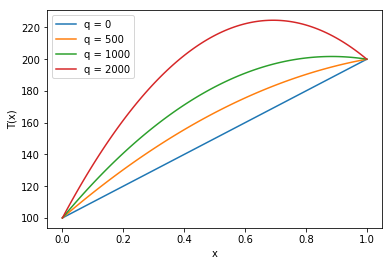

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from array import *

T1 = 100
T2 = 200
delta_T = T2-T1
L = 1

k = 385.0 # for copper

q = [0 , 500, 1000, 2000]

x = np.linspace(0,L,100)
T = 0*x

for p in range(0,len(q)):

    for i in range(0,len(x)):
    
        Char_X = x[i]/L
        Po = q[p]*L**2/k
        
        T[i] = (Char_X +  Char_X*Po*(1-Char_X)/2)*delta_T + T1
    
    plt.plot(x,T)

p = ('0' , '500', '1000', '2000')
l = ['q = ' +  s for s in p]
plt.legend(l)
plt.xlabel('x')
plt.ylabel('T(x)')

[  100.     0.  -100.  -200.  -300.  -400.  -500.  -600.  -700.  -800.
  -900. -1000. -1100. -1200. -1300. -1400. -1500. -1600. -1700. -1800.
 -1900. -2000. -2100. -2200. -2300. -2400. -2500. -2600. -2700. -2800.
 -2900. -3000. -3100. -3200. -3300. -3400. -3500. -3600. -3700. -3800.
 -3900. -4000. -4100. -4200. -4300. -4400. -4500. -4600. -4700. -4800.
 -4900. -5000. -5100. -5200. -5300. -5400. -5500. -5600. -5700. -5800.
 -5900. -6000. -6100. -6200. -6300. -6400. -6500. -6600. -6700. -6800.
 -6900. -7000. -7100. -7200. -7300. -7400. -7500. -7600. -7700. -7800.
 -7900. -8000. -8100. -8200. -8300. -8400. -8500. -8600. -8700. -8800.
 -8900. -9000. -9100. -9200. -9300. -9400. -9500. -9600. -9700. -9800.]


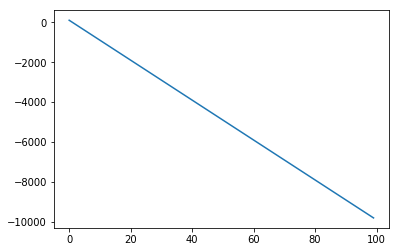

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from array import *

T1 = 100
T2 = 200
delta_T = T2-T1
L = 1

k = 385.0 # for copper

q = [500]

x = 100;
x_cuts = 100

x_inc = x / x_cuts 

overall = range(0,x,x_inc)



T = 0*(np.zeros(x_cuts))
T[0] = T1
T[x_cuts-1] = T2


for i in range(1,x_cuts-1):
        T[i+1] = 2*T[i] - T[i-1]
        
plt.plot(overall,T)
print(T)